In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# UFO Sightings

The data set has been taken from kaggle datasets which can be found in the following location:

"https://www.kaggle.com/hakeemtfrank/ufo-sightings-data-exploration"

The dataset contained severl columns and over 80,000 rows. Due to the numerous errors in the dataset, it was reduced by half to work on the following exercise. 

The following presents a few simple analyses of the data comprising: 

- the trend of UFO sightings over time;
- the geographical distribution of UFO sightings;
- distribution of time of sightings; and
- UFO shapes.

## Import UFO data set

In [2]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('complete_2.csv', low_memory=False)

In [5]:
# Check data frame typ
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,day,month,year,date,time,city,state,country,shape,duration (seconds),latitude,longitude
0,10,10,1949,10/10/1949,20:30:00,san marcos,tx,us,cylinder,2700,29.883056,-97.941111
1,10,10,1949,10/10/1949,21:00:00,lackland afb,tx,us,light,7200,29.384210,-98.581082
2,10,10,1955,10/10/1955,17:00:00,chester (uk),NaN,gb,circle,20,53.200000,-2.916667
3,10,10,1956,10/10/1956,21:00:00,edna,tx,us,circle,20,28.978333,-96.645833
4,10,10,1960,10/10/1960,20:00:00,kaneohe,hi,us,light,900,21.418056,-157.803611


In [7]:
df.shape

(35547, 12)

In [8]:
# Check data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35547 entries, 0 to 35546
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   day                 35547 non-null  int64  
 1   month               35547 non-null  int64  
 2   year                35547 non-null  int64  
 3   date                35547 non-null  object 
 4   time                35547 non-null  object 
 5   city                35547 non-null  object 
 6   state               32707 non-null  object 
 7   country             32663 non-null  object 
 8   shape               35547 non-null  object 
 9   duration (seconds)  35547 non-null  int64  
 10  latitude            35547 non-null  float64
 11  longitude           35547 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 3.3+ MB


## Check sightings by year

In [9]:
# Check for NaN and null

df['year'].isna().value_counts()

False    35547
Name: year, dtype: int64

In [10]:
# check for 0

(df['year']== 0).sum()

0

In [11]:
# create pandas dataframe grouped by year and sum counts. 

year = df[['year']].copy()  # Add a .copy() to remove the loc warning, since this is a copy of df and not a subset. 

year.loc[:,'counts'] = 1    # Creates new column with appropriate syntax.

year = year.groupby(['year']).sum().sort_values(by = 'year').reset_index()

# year

In [12]:
# set seaborn as default plot

sns.set_style("whitegrid")
sns.set_context("notebook",  font_scale = 1.5, rc={"lines.linewidth": 2, "grid.linewidth": 0.6, 'figure.dpi':300})
sns.despine()

<Figure size 432x288 with 0 Axes>

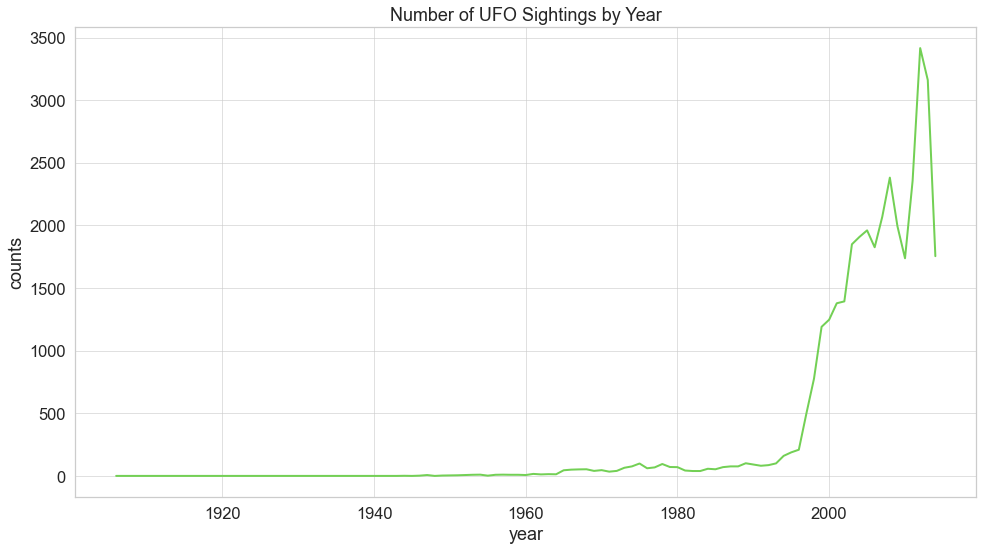

In [13]:
# plot

fig, ax = plt.subplots(figsize=(14, 8))

sns.lineplot(x = 'year', y = 'counts', data = year, color = '#73D055FF').set_title('Number of UFO Sightings by Year')

plt.tight_layout()

- The graph suggests that UFOS are becomming more frequent over the last two decades, perhaps due to their improved technology!


- Although, it is more likely to be a combination of modern technology (drones etc.), better and faster communication, and the increase in official UFO sightings being investigated...

## UFO sightings by country

Time to check which country has the most visits!

The 'county' column can be used for this, although the data is messy and needs tidying up. 

In [14]:
# Check for NaN and null

df['country'].isna().value_counts()

False    32663
True      2884
Name: country, dtype: int64

In [15]:
# change city column to string

df['city'] = df['city'].astype('str')

In [16]:
# get the country from city column - anything between brackets is a country

df['city_country'] = df['city'].str.extract('.*\((.*)\).*')


In [17]:
# extraction leads to mixed types, nan are floats and countries are strings. Check.

type(df['city_country'][0])

float

In [18]:
type(df['city_country'][2])

str

In [19]:
# Make sure column is a string

df['city_country'] = df['city_country'].astype('str')

In [20]:
# Check the different countries from the city_country column

df['city_country'].unique()

array(['nan', 'uk', 'canada', 'new zealand', 'russia', 'australia',
       'italy', 'norway', 'denmark', 'iceland', 'puerto rico', 'austria',
       'japan', 'peru', 'turkey', 'belgium', 'china', 'greece',
       'malaysia', 'armenia', 'france', 'kendall', 'republic of ireland',
       'india', 'thailand', 'hungary', 'germany', 'spain', 'philippines',
       'venezuela', 'pakistan', 'iran', 'afghanistan', 'morocco',
       'taiwan', 'israel', 'egypt', 'poland', 'south africa',
       'costa rica', 'south korea', 'honduras', 'lithuania', 'sweden',
       'netherlands', 'mexico', 'dominican republic', 'macedonia',
       'argentina', 'jamaica', 'switzerland', 'bangladesh',
       'czech republic', 'northern ireland', 'cyprus', 'greenland',
       'belize', 'kuwait', 'romania', 'ukraine', 'bulgaria', 'slovakia',
       'algeria', 'trinidad', 'iraq', 'finland', 'lebanon', 'sri lanka',
       'bosnia', 'latvia', 'croatia', 'uzbekistan', 'ghana', 'brazil',
       'vietnam', 'nepal', 'bolivia

In [21]:
# Infill nan with city_country column

df.loc[df['country'].isnull(),'country'] = df['city_country']

df.tail()

,day,month,year,date,time,city,state,country,shape,duration (seconds),latitude,longitude,city_country
35542,4,21,2014,4/21/2014,21:45:00,port of spain (trinidad),NaN,trinidad,unknown,2400,10.666667,-61.516667,trinidad
35543,4,21,2014,4/21/2014,22:00:00,north atlanta,ga,us,light,15,33.865000,-84.336667,nan
35544,4,21,2014,4/21/2014,22:15:00,quezon city (philippines),NaN,philippines,light,3,14.676041,121.043700,philippines
35545,4,21,2014,4/21/2014,22:20:00,ozark,mo,us,triangle,120,37.020833,-93.205833,nan
35546,4,21,2014,4/21/2014,23:00:00,chesterfield,va,us,unknown,1800,37.376944,-77.506111,nan


In [22]:
# Check all values from 'country' and change names

df['country'].unique()

array(['us', 'gb', 'be', 'canada', 'nz', 'ca', 'ru', 'au', 'it', 'no',
       'de', 'ic', 'puerto rico', 'ja', 'pe', 'vi', 'tu', 'ch', 'hk',
       'gr', 'nan', 'malaysia', 'armenia', 'france',
       'republic of ireland', 'india', 'thailand', 'hungary', 'japan',
       'new zealand', 'spain', 'philippines', 'uk', 'greece', 'venezuela',
       'pakistan', 'iran', 'afghanistan', 'morocco', 'taiwan',
       'australia', 'china', 'norway', 'israel', 'egypt', 'pol',
       'south africa', 'belgium', 'iceland', 'costa rica', 'south korea',
       'honduras', 'lithuania', 'sweden', 'italy', 'netherlands',
       'mexico', 'dominican republic', 'macedonia', 'argentina',
       'denmark', 'jamaica', 'switzerland', 'bangladesh',
       'czech republic', 'northern ireland', 'cyprus', 'peru',
       'greenland', 'belize', 'kuwait', 'romania', 'ukraine', 'bulgaria',
       'slovakia', 'algeria', 'trinidad', 'iraq', 'finland', 'russia',
       'lebanon', 'sri lanka', 'germany', 'bosnia', 'latvia',

In [23]:
# Change acronyms to country

df.loc[df['country'] == 'us', 'country'] = 'USA'
df.loc[df['country'] == 's', 'country'] = 'USA'
df.loc[df['country'] == 'gb', 'country'] = 'UK'
df.loc[df['country'] == 'ca', 'country'] = 'canada'
df.loc[df['country'] == 'nz', 'country'] = 'new zealand'
df.loc[df['country'] == 'ru', 'country'] = 'russia'
df.loc[df['country'] == 'au', 'country'] = 'australia'
df.loc[df['country'] == 'it', 'country'] = 'italy'
df.loc[df['country'] == 'li', 'country'] = 'lithuania'
df.loc[df['country'] == 'no', 'country'] = 'norway'
df.loc[df['country'] == 'de', 'country'] = 'denmark'
df.loc[df['country'] == 'ic', 'country'] = 'iceland'
df.loc[df['country'] == 'me', 'country'] = 'mexico'
df.loc[df['country'] == 'ja', 'country'] = 'japan'
df.loc[df['country'] == 'pe', 'country'] = 'peru'
df.loc[df['country'] == 'vi', 'country'] = 'vietnam'
df.loc[df['country'] == 'tu', 'country'] = 'turkey'
df.loc[df['country'] == 'ch', 'country'] = 'china'
df.loc[df['country'] == 'hk', 'country'] = 'hong kong'
df.loc[df['country'] == 'gr', 'country'] = 'greece'
df.loc[df['country'] == 'sp', 'country'] = 'spain'
df.loc[df['country'] == 'uae', 'country'] = 'uae'
df.loc[df['country'] == 'fr', 'country'] = 'france'
df.loc[df['country'] == 'ar', 'country'] = 'argentina'
df.loc[df['country'] == 'in', 'country'] = 'india'
df.loc[df['country'] == 'sa', 'country'] = 'south africa'
df.loc[df['country'] == 'se', 'country'] = 'serbia'
df.loc[df['country'] == 'pu', 'country'] = 'puerto rico'
df.loc[df['country'] == 'ir', 'country'] = 'republic of ireland'
df.loc[df['country'] == 'po', 'country'] = 'portugal'
df.loc[df['country'] == 'pol', 'country'] = 'poland'
df.loc[df['country'] == 'ne', 'country'] = 'netherlands'
df.loc[df['country'] == 'tr', 'country'] = 'trinidad'
df.loc[df['country'] == 'ne', 'country'] = 'netherlands'
df.loc[df['country'] == 'is', 'country'] = 'israel'
df.loc[df['country'] == 'th', 'country'] = 'thailand'
df.loc[df['country'] == 'ma', 'country'] = 'malaysia'
df.loc[df['country'] == 'sk', 'country'] = 'south korea'
df.loc[df['country'] == 'ho', 'country'] = 'honduras'
df.loc[df['country'] == 'roi', 'country'] = 'republic of ireland'
df.loc[df['country'] == 'na', 'country'] = 'namibia'
df.loc[df['country'] == 'ku', 'country'] = 'kuwait'
df.loc[df['country'] == 'br', 'country'] = 'brazil'
df.loc[df['country'] == 'be', 'country'] = 'belgium'
df.loc[df['country'] == 'Nan', 'country'] = 'unknown'

In [24]:
# capitalise each word

df['country'] = df['country'].str.capitalize()

# Check changes 

df['country'].unique()

array(['Usa', 'Uk', 'Belgium', 'Canada', 'New zealand', 'Russia',
       'Australia', 'Italy', 'Norway', 'Denmark', 'Iceland',
       'Puerto rico', 'Japan', 'Peru', 'Vietnam', 'Turkey', 'China',
       'Hong kong', 'Greece', 'Nan', 'Malaysia', 'Armenia', 'France',
       'Republic of ireland', 'India', 'Thailand', 'Hungary', 'Spain',
       'Philippines', 'Venezuela', 'Pakistan', 'Iran', 'Afghanistan',
       'Morocco', 'Taiwan', 'Israel', 'Egypt', 'Poland', 'South africa',
       'Costa rica', 'South korea', 'Honduras', 'Lithuania', 'Sweden',
       'Netherlands', 'Mexico', 'Dominican republic', 'Macedonia',
       'Argentina', 'Jamaica', 'Switzerland', 'Bangladesh',
       'Czech republic', 'Northern ireland', 'Cyprus', 'Greenland',
       'Belize', 'Kuwait', 'Romania', 'Ukraine', 'Bulgaria', 'Slovakia',
       'Algeria', 'Trinidad', 'Iraq', 'Finland', 'Lebanon', 'Sri lanka',
       'Germany', 'Bosnia', 'Latvia', 'Croatia', 'Uzbekistan', 'Ghana',
       'Brazil', 'Austria', 'Nepal',

In [25]:
# create df for the 10 countries with the highest UFO sightings - there are too many countries to display them all. 

country = df['country'].value_counts().nlargest(10)

country

Usa             31025
Canada           1259
Uk                971
Nan               644
Australia         269
India             127
Mexico            123
South africa       86
New zealand        75
Puerto rico        58
Name: country, dtype: int64

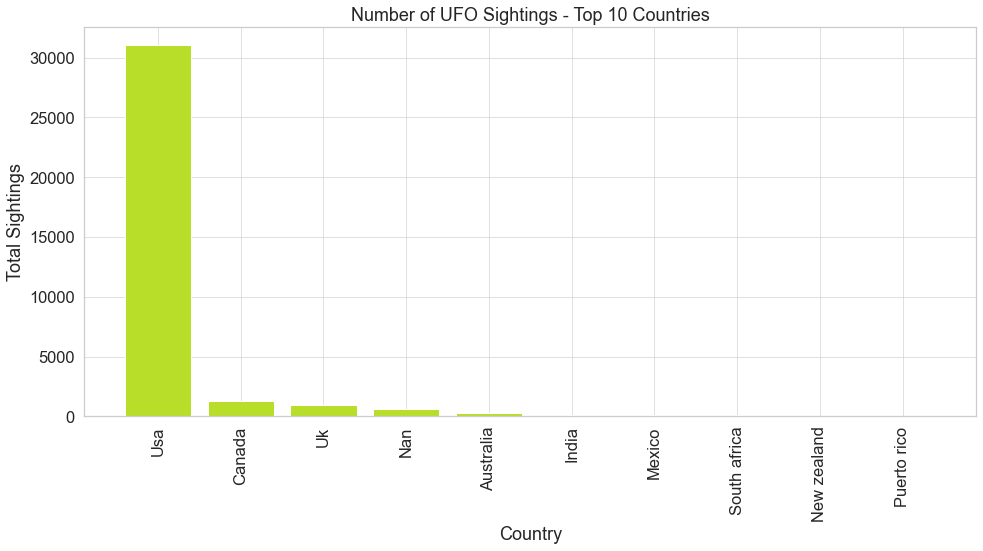

In [26]:
# Plot bar graph of the sightings by top 10 coutries - this time use matplotlib withour seaborn 

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(x = country.index, height = country, color = '#B8DE29FF')
plt.xticks(rotation='vertical')
ax.set_xlabel('Country');
ax.set_ylabel('Total Sightings')
ax.set_title('Number of UFO Sightings - Top 10 Countries');

plt.tight_layout()

In [27]:
# Percentage USA

total = (((df['country'] == 'Usa').sum()) / (df.shape[0])) * 100

total

87.27881396461024

- This graph suggests that UFOs are most interested in the USA, by a considerable amount. In fact % 87 of all UFO sightings are from the Usa!


- We can also see that the states of California and Florida have have the greatest number of observations, whislt ... has the fewest.

### UFO Sightings across the USA

Time to look further into the UFO sightings across the USA!

In [28]:
# check for nan

df['latitude'].isnull().sum()

0

In [29]:
# check for 0

(df['latitude']== 0).sum()

480

In [30]:
# Remove longitude and latitude without co-ordinates

df = df[df['latitude'] != 0]

# Check 

(df['latitude']== 0).sum()

0

In [31]:
# create location df and check the country is Usa

location = df[df['country'] == 'Usa']

location['country'].unique()

array(['Usa'], dtype=object)

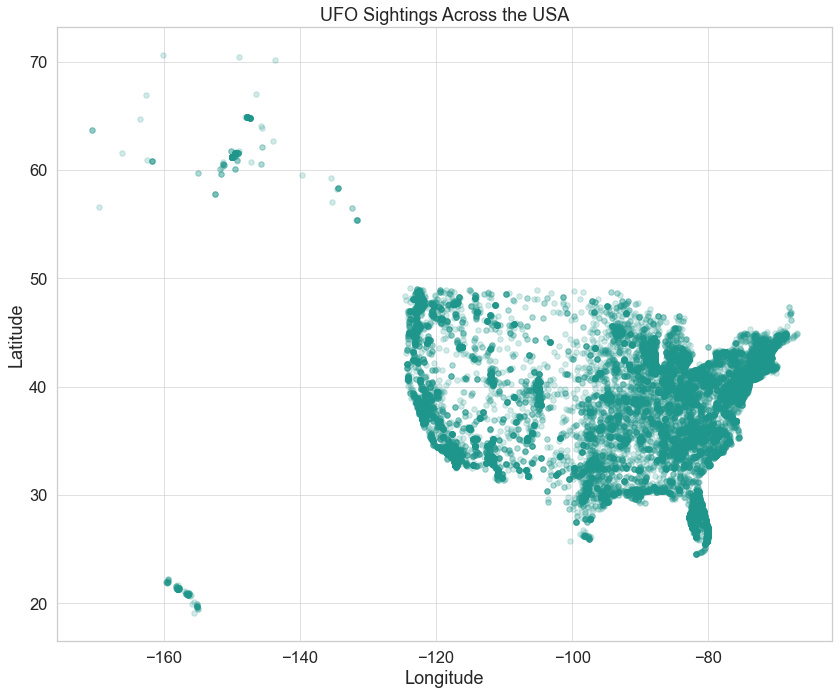

In [32]:
# Plot the locations of the UFOs

fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(x=location['longitude'], y=location['latitude'],
           alpha = 0.2,
           c = '#1F968BFF', 
           s = 30)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('UFO Sightings Across the USA');

plt.tight_layout()

In [33]:
# find the state with highest number of UFO sightings by state 

state_la = location['state'].value_counts().nlargest(3)

state_la

ca    4553
fl    2268
tx    1748
Name: state, dtype: int64

In [34]:
# Find the state with the lowest number of UFO sightings by state

state_sm = location['state'].value_counts().nsmallest(3)

state_sm

dc    31
nd    44
wy    72
Name: state, dtype: int64

- It appears the UFOs are not clustered in any single location, and the spread of the sightings are similar to the population density in the USA.  


- There are few sightings in Alaska which suggests UFOs don't like the cold. To check this, UFO sightings by state were checked. We can see that California, Florida and Texas have the greatest number of sightings, whilst DC, North Dakota and Wyoming have the fewest. This suggests that UFOs prefer the heat....but actually this just follows the population trend, where Ca, fl and tx have the most people, and wy and nd the least.


- Is dc a state? I think the data here needs to be cleaned...

### Check the distrubution by the time of the sightings.

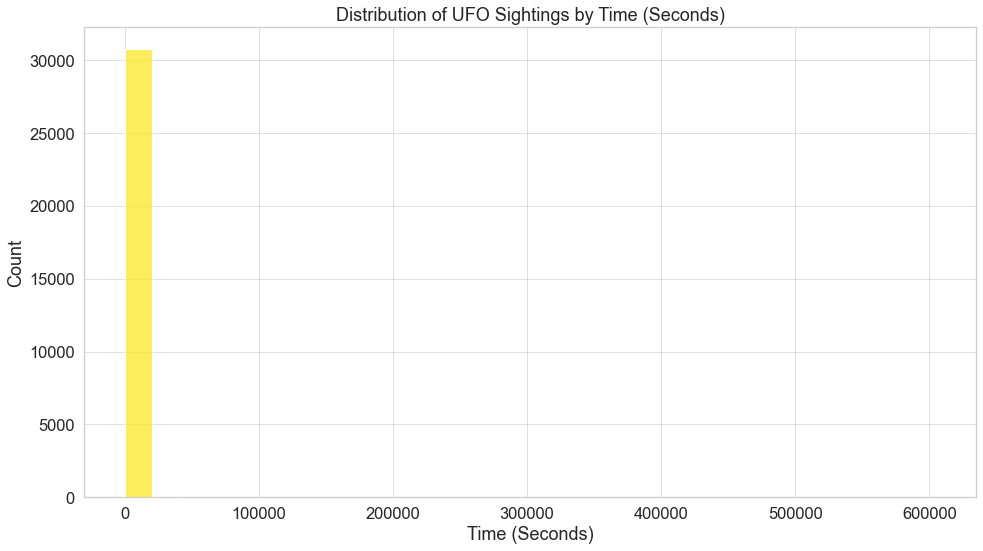

In [35]:
# Check the duration to make sure times are not erroneous
fig, ax = plt.subplots(figsize=(14, 8))

sns.histplot(data = location['duration (seconds)'], 
             bins = 30,
             color = '#FDE725FF')

ax.set_xlabel('Time (Seconds)')
ax.set_ylabel('Count')
ax.set_title('Distribution of UFO Sightings by Time (Seconds)');

plt.tight_layout()

- The histogram shows that most of the observations are of a short duration, yet there are some longer that seem to be distorting the data. Therefore, removing those greater than a few hours seems sensible. 

In [36]:
# Remove anything less than a few hours, rougly set as 10000 seconds

location = location.drop(location.loc[location['duration (seconds)'] > 10000].index)

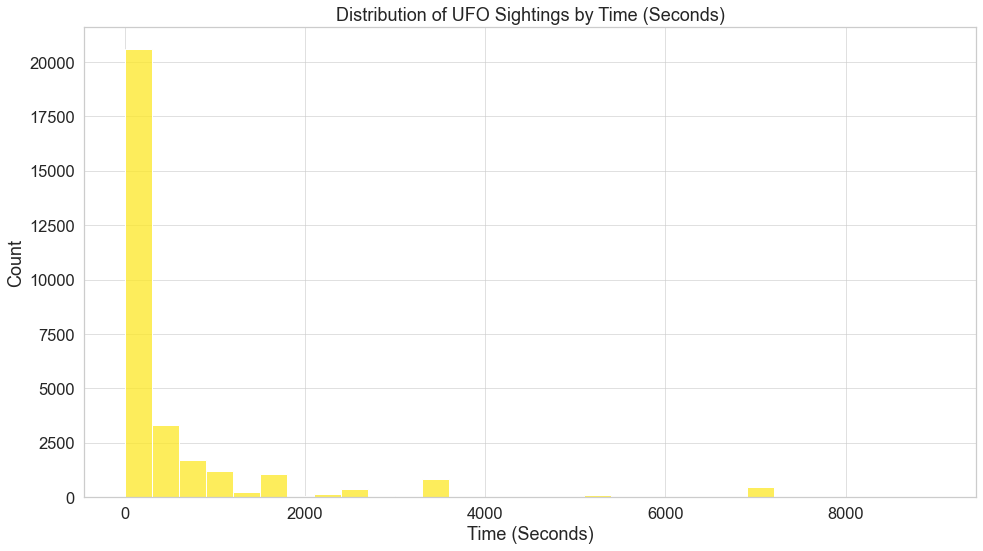

In [37]:
# Check again 

fig, ax = plt.subplots(figsize=(14, 8))

sns.histplot(data = location['duration (seconds)'], 
             bins = 30,             
             color = '#FDE725FF')

ax.set_xlabel('Time (Seconds)')
ax.set_ylabel('Count')
ax.set_title('Distribution of UFO Sightings by Time (Seconds)');

plt.tight_layout()

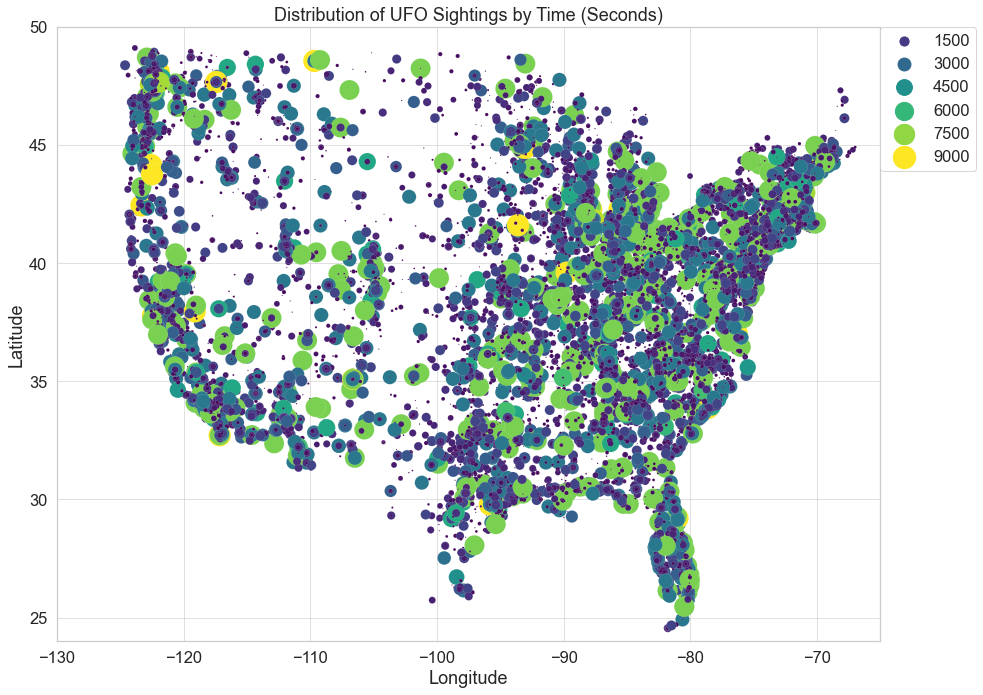

In [38]:
# Plot the locations of the UFOs and colour and shape them by duration of sightings. 

fig, ax = plt.subplots(figsize=(14, 10))

sns.scatterplot(data = location, x = "longitude", y = "latitude", 
                hue = "duration (seconds)", 
                size = "duration (seconds)",
                palette = "viridis",
                sizes=(1, 500))

# Set limit to mainland and exclude Alaska and Hawaii which have very few sightings
ax.set_xlim([-130, -65])
ax.set_ylim([24,50])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Distribution of UFO Sightings by Time (Seconds)');

plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
plt.tight_layout()

- There doesn't seem to be any pattern. looked at duraton < 10000 but again no patterns. Need to look at the data closer by state.

### Now to plot by shape

In [39]:
# check values

location['shape'] = location['shape'].str.capitalize()

location['shape'].unique()

array(['Cylinder', 'Light', 'Circle', 'Sphere', 'Disk', 'Fireball',
       'Unknown', 'Oval', 'Other', 'Rectangle', 'Chevron', 'Formation',
       'Triangle', 'Cigar', 'Changing', 'Diamond', 'Flash', 'Egg',
       'Teardrop', 'Cone', 'Cross', 'Pyramid', 'Round', 'Delta',
       'Crescent', 'Flare', 'Hexagon'], dtype=object)

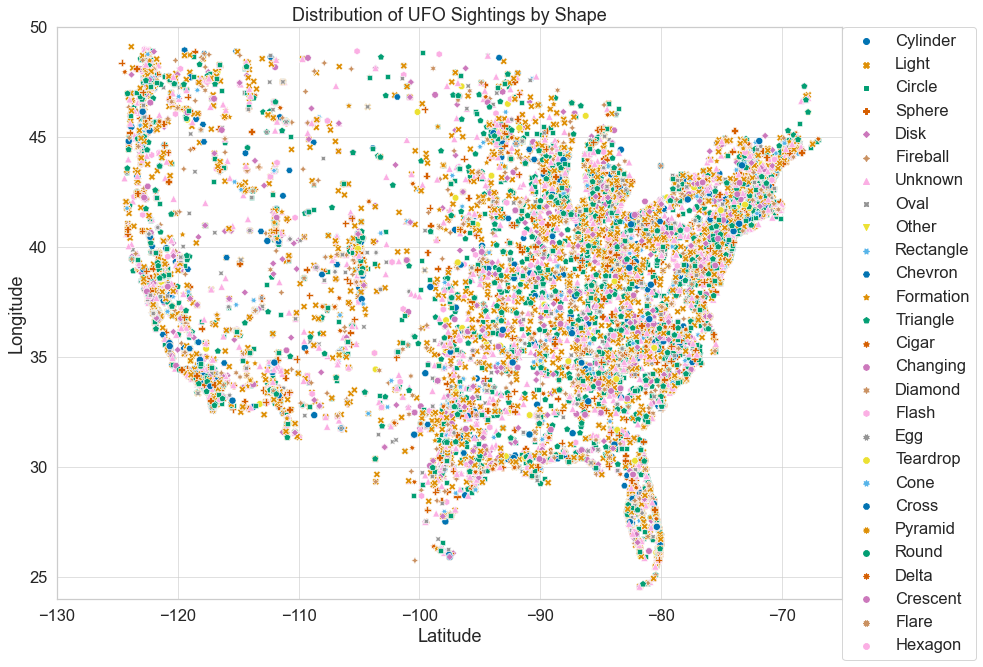

In [40]:
# Plot bar graph of the sightings by year and predict next decade

fig, ax = plt.subplots(figsize=(14, 10))

sns.scatterplot(data = location, x = "longitude", y = "latitude", 
                hue = "shape",
                style = "shape",
                s = 50,
                palette = "colorblind")

# Set limit to mainland and exclude Alaska and Hawaii which have very few sightings
ax.set_xlim([-130, -65])
ax.set_ylim([24,50])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Distribution of UFO Sightings by Shape');

plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
#plt.legend(loc='bottom left')
plt.tight_layout()